In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [2]:
conn = MongoClient(host='127.0.0.1', port=27017)  # 实例化MongoClient
db = conn.get_database('Lianjia')  # 连接到Lianjia数据库

zufang = db.get_collection('zufang') # 连接到集合zufang
mon_data = zufang.find()  # 查询这个集合下的所有记录

In [3]:
data = json_normalize([comment for comment in mon_data])#解析这个json

In [4]:
data.head()

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
0,5d1a090c38a4e51e8e5e0591,2,3,世纪城,北京,海淀,721,南,2,近地铁 集中供暖 新上,垂虹园 3室2厅 南,39.967021,3室2厅2卫,116.293479,https://m.lianjia.com/chuzu/bj/zufang/BJ229062...,164,21000,元/月,垂虹园,整租
1,5d1a090d38a4e51e8e5e0593,2,3,世纪城,北京,海淀,828,东南,2,精装 集中供暖 双卫生间 新上,整租·远大园五区 3室2厅 东南,39.959175,3室2厅2卫,116.289427,https://m.lianjia.com/chuzu/bj/zufang/BJ228955...,152,18000,元/月,远大园五区,整租
2,5d1a090d38a4e51e8e5e0595,1,2,世纪城,北京,海淀,724,东南,1,近地铁 集中供暖 随时看房,远大园四区 2室1厅 东南,39.959747,2室1厅1卫,116.292721,https://m.lianjia.com/chuzu/bj/zufang/BJ228178...,85,8500,元/月,远大园四区,整租
3,5d1a090e38a4e51e8e5e0597,2,3,世纪城,北京,海淀,1101,南 北,2,精装 集中供暖 双卫生间 新上 随时看房,整租·远大园一区 3室2厅 南/北,39.961689,3室2厅2卫,116.285995,https://m.lianjia.com/chuzu/bj/zufang/BJ228759...,165,18000,元/月,远大园一区,整租
4,5d1a090f38a4e51e8e5e0599,2,3,世纪城,北京,海淀,873,东 南 北,2,近地铁 集中供暖 新上,春荫园 3室2厅 东/南/北,39.968979,3室2厅2卫,116.288287,https://m.lianjia.com/chuzu/bj/zufang/BJ229062...,162,18000,元/月,春荫园,整租


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92604 entries, 0 to 92603
Data columns (total 20 columns):
_id                   92604 non-null object
bathroom_num          92604 non-null object
bedroom_num           92604 non-null object
bizcircle_name        92604 non-null object
city                  92604 non-null object
dist                  92604 non-null object
distance              48998 non-null object
frame_orientation     92604 non-null object
hall_num              92604 non-null object
house_tag             73133 non-null object
house_title           92604 non-null object
latitude              92604 non-null object
layout                92604 non-null object
longitude             92604 non-null object
m_url                 92604 non-null object
rent_area             92604 non-null object
rent_price_listing    92604 non-null object
rent_price_unit       92604 non-null object
resblock_name         92604 non-null object
type                  92604 non-null object
dtypes: obj

In [6]:
# 每个城市各采样3000条数据，保存为csv文件
data_sample = pd.concat([data[data['city']==city].sample(3000) for city in ['北京', '上海', '广州', '深圳']])##pd.concat拼接df
data_sample.to_csv('data_sample.csv', index=False)

In [7]:
# 数据清洗(按列清理)
# 1. 去掉“_id”列
data = data.drop(columns='_id')

In [8]:
# 2. bathroom_num
data['bathroom_num'].unique()#查看bathroom_num有什么值##unique

array(['2', '1', '0', '4', '3', '5', '6', '7', '9', '8'], dtype=object)

In [9]:
data[data['bathroom_num'].isin(['8','9','11'])]#查看bathroom_num=8/9/11的数据##isin

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
8738,9,9,北七家,北京,昌平,None,东 南 西 北,5,精装,整租·麦卡伦地 9室5厅 东/南/西/北,40.146554,9室5厅9卫,116.418277,https://m.lianjia.com/chuzu/bj/zufang/BJ203027...,544,45000,元/月,麦卡伦地,整租
20243,9,10,花木,上海,浦东,404,南,5,近地铁,花木路1701号 10室5厅 南,31.220902,10室5厅9卫,121.570658,https://m.lianjia.com/chuzu/sh/zufang/SH212387...,581,330000,元/月,花木路1701号,整租
22629,8,7,唐镇,上海,浦东,None,南,2,None,白金瀚宫 7室2厅 南,31.231396,7室2厅8卫,121.665375,https://m.lianjia.com/chuzu/sh/zufang/SH222508...,483,70000,元/月,白金瀚宫,整租
23845,9,20,张江,上海,浦东,None,南,9,None,汇洋北宿舍 20室9厅 南,31.166592,20室9厅9卫,121.643936,https://m.lianjia.com/chuzu/sh/zufang/SH226792...,5600,369600,元/月,汇洋北宿舍,整租
23978,8,6,张江,上海,浦东,None,北,2,None,整租·汤臣高尔夫(别墅) 6室2厅 北,31.225384,6室2厅8卫,121.5882,https://m.lianjia.com/chuzu/sh/zufang/SH222538...,417,60000,元/月,汤臣高尔夫(别墅),整租
24064,8,7,祝桥,上海,浦东,None,南 北,3,None,东海御庭 7室3厅 南/北,31.214139,7室3厅8卫,121.776494,https://m.lianjia.com/chuzu/sh/zufang/SH206789...,767,16000,元/月,东海御庭,整租
31156,8,8,莘闵别墅,上海,松江,None,南,4,None,桃花源田庄 8室4厅 南,31.101212,8室4厅8卫,121.354455,https://m.lianjia.com/chuzu/sh/zufang/SH219030...,504,36000,元/月,桃花源田庄,整租
33518,8,8,赵巷,上海,青浦,None,,6,None,整租·香水湾 8室6厅,31.158286,8室6厅8卫,121.248358,https://m.lianjia.com/chuzu/sh/zufang/SH192424...,498,30000,元/月,香水湾,整租
37104,8,1,科学城,广州,增城,None,南,1,None,保利越秀岭南林语 1室1厅 南,23.218326,1室1厅8卫,113.508152,https://m.lianjia.com/chuzu/gz/zufang/GZ225989...,1500,120000,元/月,保利越秀岭南林语,整租
56929,8,9,白云大道南,广州,白云,594,南 北,3,近地铁,珠江岭南苑 9室3厅 南/北,23.202732,9室3厅8卫,113.286666,https://m.lianjia.com/chuzu/gz/zufang/GZ202798...,500,80000,元/月,珠江岭南苑,整租


In [10]:
# 除了55273行是异常数据外，其它数据都正常
#data = data.drop([55273])

In [11]:
# 3. bedroom_num
data['bedroom_num'].unique()#查看bedroom_num有什么值

array(['3', '2', '1', '4', '5', '6', '0', '7', '9', '8', '15', '11', '10',
       '20', '12'], dtype=object)

In [12]:
# 没有异常数据，只是很多10室以上都是专门用来合租的
data[data['bedroom_num'].isin(['10','11','12','13','14','15','20'])]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
17627,2,15,西郊,上海,长宁,None,南,2,None,金庭庄园酒店 15室2厅 南,31.2102489,15室2厅2卫,121.3635752,https://m.lianjia.com/chuzu/sh/zufang/SH226204...,450,85000,元/月,金庭庄园酒店,整租
17748,4,11,新华路,上海,长宁,None,南,3,近地铁 精装,整租·大境别墅 11室3厅 南,31.212721,11室3厅4卫,121.436966,https://m.lianjia.com/chuzu/sh/zufang/SH223760...,568,180000,元/月,大境别墅,整租
18218,5,10,中山公园,上海,长宁,531,南,3,近地铁,整租·定西路1235弄 10室3厅 南,31.22102198,10室3厅5卫,121.4288858,https://m.lianjia.com/chuzu/sh/zufang/SH224626...,638,250000,元/月,定西路1235弄,整租
20243,9,10,花木,上海,浦东,404,南,5,近地铁,花木路1701号 10室5厅 南,31.220902,10室5厅9卫,121.570658,https://m.lianjia.com/chuzu/sh/zufang/SH212387...,581,330000,元/月,花木路1701号,整租
23845,9,20,张江,上海,浦东,None,南,9,None,汇洋北宿舍 20室9厅 南,31.166592,20室9厅9卫,121.643936,https://m.lianjia.com/chuzu/sh/zufang/SH226792...,5600,369600,元/月,汇洋北宿舍,整租
27569,3,10,航华,上海,闵行,432,东 东南 南 西南 西,3,None,沪光小区 10室3厅 东/东南/南/西南/西,31.18469063,10室3厅3卫,121.3578945,https://m.lianjia.com/chuzu/sh/zufang/SH226788...,1000,42000,元/月,沪光小区,整租
40074,3,11,天润路,广州,天河,838,南,3,近地铁,协和新世界 11室3厅 南,23.148205,11室3厅3卫,113.34458,https://m.lianjia.com/chuzu/gz/zufang/GZ224208...,304,18000,元/月,协和新世界,整租
47757,1,10,滨江中,广州,海珠,557,东 南 西 北,0,近地铁,滨江中路 10室0厅 东/南/西/北,23.116649,10室0厅1卫,113.287241,https://m.lianjia.com/chuzu/gz/zufang/GZ222226...,480,33600,元/月,滨江中路,整租
47760,1,10,滨江中,广州,海珠,557,东 南 西 北,1,近地铁,滨江中路 10室1厅 东/南/西/北,23.116649,10室1厅1卫,113.287241,https://m.lianjia.com/chuzu/gz/zufang/GZ222227...,450,33000,元/月,滨江中路,整租
51608,1,15,会江,广州,番禺,None,南,1,精装,整租·敏捷御峰国际 15室1厅 南,23.008658,15室1厅1卫,113.310885,https://m.lianjia.com/chuzu/gz/zufang/GZ213259...,408,25000,元/月,敏捷御峰国际,整租


In [13]:
# 4. distance
data['frame_orientation'].unique()  # 这个数据太乱了，要用的时候再处理吧

array(['南', '东南', '南 北', '东 南 北', '东 北', '东', '西南', '西北', '东南 南', '西',
       '北', '东 西', '南 西北', '东北', '东 南 西', '南 西 北', '东 东南', '东 东南 南',
       '东南 西南', '南 西', '东南 北', '东 南', '东 南 西 北', '东 西北', '东 东北', '西 北',
       '西南 北', '东 西 北', '南 西南 北', '北 东北', '东南 西', '南 西 西北', '西 西北',
       '东南 东北', '西南 西北', '南 东北', '东南 南 北', '西南 西', '南 西南', '东南 西北',
       '东 北 东北', '东 东南 南 西', '西南 东北', '东 西南', '南 北 东北', '南 西南 西',
       '西南 西 西北', '东 东南 南 北', '', '西 西北 北', '西北 北', '东南 西南 西', '南 西北 北',
       '东南 南 西', '西 东北', '东南 南 西南', '东 东南 南 西南 西', '东 东南 南 西南', '东南 南 西北',
       ' 东南', '西北 东北', '未知', ' 东南 南', ' 南', ' 北', '东南 西南 西北',
       ' 东 东南 南 西南 西 西北 北 东北', '东 东南 南 西南 西 西北 北 东北', ' 东 南', ' 西', ' 东',
       '东 南 东北', '东 南 西南', '东 南 西南 西北', '东南 南 西南 西 西北 北', '东 东南 南 西南 西 北',
       ' 东北', '东南 南 西北 北', '东 东南 南 西南 西北 北', '东 东南 南 西南 西 西北 北',
       '东 东南 南 西南 北', ' 东南 北', '东南 南 西南 东北', '东 南 西南 西', '东 东南 西南 西',
       '东 东南 南 西南 西 西北 东北', '西南 西北 北', '南 西南 东北', '东南 南 西南 北', ' 南 北',
       '南 西南 西北', '东 

In [14]:
# 5. hall_num
data['hall_num'].unique()

array(['2', '1', '0', '4', '3', '5', '7', '9', '6'], dtype=object)

In [15]:
data[data['hall_num'].isin(['6','11'])]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
27427,6,7,华漕,上海,闵行,917,南,6,None,西郊庄园 7室6厅 南,31.203287,7室6厅6卫,121.290494,https://m.lianjia.com/chuzu/sh/zufang/SH225863...,573,80000,元/月,西郊庄园,整租
33518,8,8,赵巷,上海,青浦,None,,6,None,整租·香水湾 8室6厅,31.158286,8室6厅8卫,121.248358,https://m.lianjia.com/chuzu/sh/zufang/SH192424...,498,30000,元/月,香水湾,整租
33734,6,6,朱家角,上海,青浦,699,南,6,近地铁,古北香堤艺墅 6室6厅 南,31.115688,6室6厅6卫,121.048724,https://m.lianjia.com/chuzu/sh/zufang/SH221518...,285,25000,元/月,古北香堤艺墅,整租
55926,5,1,星河湾,广州,番禺,None,南 北,6,新上 随时看房,广州星河湾朗心园 1室6厅 南/北,23.033043,1室6厅5卫,113.337867,https://m.lianjia.com/chuzu/gz/zufang/GZ228903...,361,15800,元/月,广州星河湾朗心园,整租
76500,3,6,宝安中心,深圳,宝安区,451,南,6,近地铁,天健时尚空间 6室6厅 南,22.555842332273,6室6厅3卫,113.89582360272,https://m.lianjia.com/chuzu/sz/zufang/SZ223664...,270,28000,元/月,天健时尚空间,整租


In [16]:
# 59223行是异常数据，删去
#data = data.drop([59223])

In [17]:
# 6. rent_area
data.sample(5)['rent_area']

46018     65
37896    130
33823     20
79252     18
11871     72
Name: rent_area, dtype: object

In [18]:
# rent_area字段有些填写的是一个范围，比如23-25平房米，后期转换成“float”类型的时候不好转换，考虑取平均值
def get_aver(data):
    if isinstance(data, str) and '-' in data:
        low, high = data.split('-')
        return (int(low)+int(high))/2
    else:
        return int(data)


data['rent_area'] = data['rent_area'].apply(get_aver)

In [19]:
data[data['rent_area'] < 5]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
43425,1,2,东山口,广州,越秀,49,南,1,近地铁 新上,署前路署前二街 2室1厅 南,23.129259,2室1厅1卫,113.300931,https://m.lianjia.com/chuzu/gz/zufang/GZ228976...,2.0,3900,元/月,署前路署前二街,整租


In [20]:
# 房间只有5平米，是异常数据，删去
data = data.drop(data[data['rent_area'] < 5].index)

In [21]:
# 7. rent_price_unit
data['rent_price_unit'].unique()

array(['元/月'], dtype=object)

In [22]:
# 租金都是以“元/月”计算的，所以这一列没用了，可以删了
data = data.drop(columns='rent_price_unit')

In [23]:
# 8. rent_price_listing
data[data['rent_price_listing'].str.contains('-')].sample(3)##.str.contains('-')

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,resblock_name,type
72994,1,1,科技园,深圳,南山区,None,南 北,0,独栋公寓 月租 近地铁 开放厨房,独栋·YOU+优家青年创业社区 大学城社区 治愈系平层 开间,22.585749,1室0厅1卫,113.967499,https://m.lianjia.com/chuzu/sz/apartment/layou...,13.5,2225-2290,,整租
45064,1,1,三元里,广州,白云,None,东南 南,0,独栋公寓 月租 开放厨房,独栋·碧家国际社区 远景路店 C栋 精装一居室 开间,23.177569,1室0厅1卫,113.256014,https://m.lianjia.com/chuzu/gz/apartment/layou...,32.0,2150-2190,,整租
71871,1,1,新洲,深圳,福田区,None,东南,1,独栋公寓 月租 拎包入住 近地铁 有阳台 开放厨房 押一付一,独栋·深圳优品公寓 新洲店 精装一房一厅 1室1厅,22.530116,1室1厅1卫,114.055053,https://m.lianjia.com/chuzu/sz/apartment/layou...,42.0,4300-4500,,整租


In [24]:
# 价格是有区间的，需要按照处理rent_area一样的方法处理
data['rent_price_listing'] = data['rent_price_listing'].apply(get_aver)##.apply

In [25]:
# 数据类型转换
for col in ['bathroom_num', 'bedroom_num', 'hall_num', 'rent_price_listing']:
    data[col] = data[col].astype(int)

In [26]:
# 'distance', 'latitude', 'longitude'因为有None，需另外处理
def dw_None_dis(data):
    if data is None:
        return np.nan
    else:
        return int(data)
    

def dw_None_latlon(data):
    if data is None or data == '':
        return np.nan
    else:
        return float(data)            


data['distance'] = data['distance'].apply(dw_None_dis)
data['latitude'] = data['latitude'].apply(dw_None_latlon)
data['longitude'] = data['longitude'].apply(dw_None_latlon)

In [27]:
# 查看数据概况
data.sample(5)

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,resblock_name,type
48092,1,1,滨江东,广州,海珠,747.0,西南,1,近地铁,听涛雅苑 1室1厅 西南,23.108003,1室1厅1卫,113.313225,https://m.lianjia.com/chuzu/gz/zufang/GZ221581...,43.0,3900,听涛雅苑,整租
52202,2,3,莲花山,广州,番禺,NaN,南,2,None,凯德山海连城 3室2厅 南,23.024965,3室2厅2卫,113.516749,https://m.lianjia.com/chuzu/gz/zufang/GZ219974...,124.0,2500,凯德山海连城,整租
24850,1,3,罗泾,上海,宝山,NaN,南,2,新上,旭辉澜悦湾 3室2厅 南,31.471010,3室2厅1卫,121.355301,https://m.lianjia.com/chuzu/sh/zufang/SH228753...,89.0,3500,旭辉澜悦湾,整租
89001,4,5,福田中心,深圳,福田区,78.0,南,1,独立卫生间 月租 近地铁 精装 独立阳台 随时看房,合租·彩虹新都 5居室 南卧,22.541689,5室1厅4卫,114.075074,https://m.lianjia.com/chuzu/sz/zufang/SZ215908...,22.0,3400,彩虹新都,合租
79446,1,1,西乡,深圳,宝安区,NaN,东,0,独栋公寓 月租 拎包入住 近地铁,独栋·平台认证机构 固戍店 雅居单间 开间,22.605819,1室0厅1卫,113.848346,https://m.lianjia.com/chuzu/sz/apartment/layou...,22.0,1780,,整租


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92603 entries, 0 to 92603
Data columns (total 18 columns):
bathroom_num          92603 non-null int32
bedroom_num           92603 non-null int32
bizcircle_name        92603 non-null object
city                  92603 non-null object
dist                  92603 non-null object
distance              48997 non-null float64
frame_orientation     92603 non-null object
hall_num              92603 non-null int32
house_tag             73132 non-null object
house_title           92603 non-null object
latitude              92603 non-null float64
layout                92603 non-null object
longitude             92603 non-null float64
m_url                 92603 non-null object
rent_area             92603 non-null float64
rent_price_listing    92603 non-null int32
resblock_name         92603 non-null object
type                  92603 non-null object
dtypes: float64(4), int32(4), object(10)
memory usage: 12.0+ MB


In [29]:
data.to_csv('data_clean.csv', index=False)

问题：
1. 各城市的租房分布怎么样？
2. 城市各区域的房价分布怎么样？
2. 距离地铁口远近有什么关系？
3. 房屋大小对价格的影响如何？
4. 租个人房源好还是公寓好？
5. 精装和简装对房子价格的影响
6. 北方集中供暖对价格的影响
7. 北上广深租房时都看重什么？

### 1. 各城市的租房分布怎么样？

In [30]:
def get_city_zf_loc(city, city_short, col=['longitude', 'latitude', 'dist'], data=data):
    file_name = 'data_' + city_short + '_latlon.csv'
    data_latlon = data.loc[data['city']==city, col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)#存放经度
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)#存放维度
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')#经纬度
    data_latlon.to_csv(file_name, index=False)#导出到Excel
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))#打印数据长度

In [31]:
get_city_zf_loc('北京', 'bj', ['longitude','latitude', 'dist'])
get_city_zf_loc('上海', 'sh', ['longitude','latitude', 'dist'])
get_city_zf_loc('广州', 'gz', ['longitude','latitude', 'dist'])
get_city_zf_loc('深圳', 'sz', ['longitude','latitude', 'dist'])

北京的数据一共有13690条
上海的数据一共有20113条
广州的数据一共有36045条
深圳的数据一共有22755条


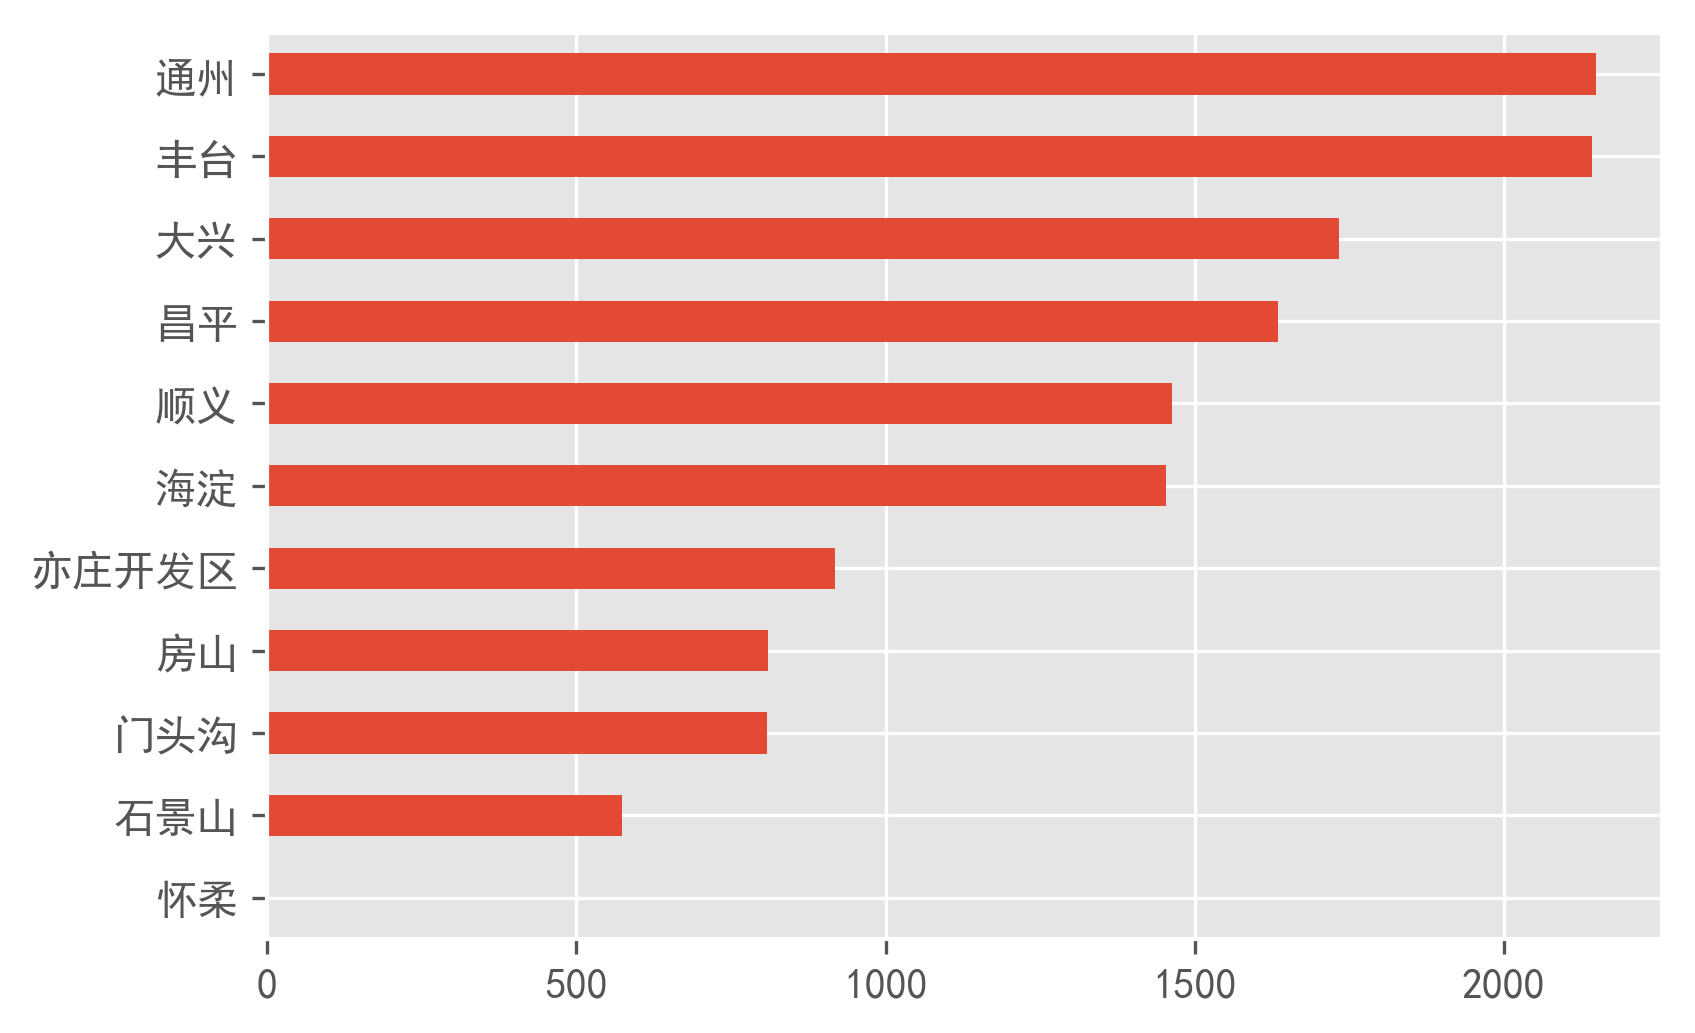

In [32]:
fig = plt.figure(dpi=300)
#取出北京的数据，按dist出条形图
data.dropna(subset=['latitude', 'longitude'])[data['city']=='北京']['dist'].value_counts(ascending=True).plot.barh()

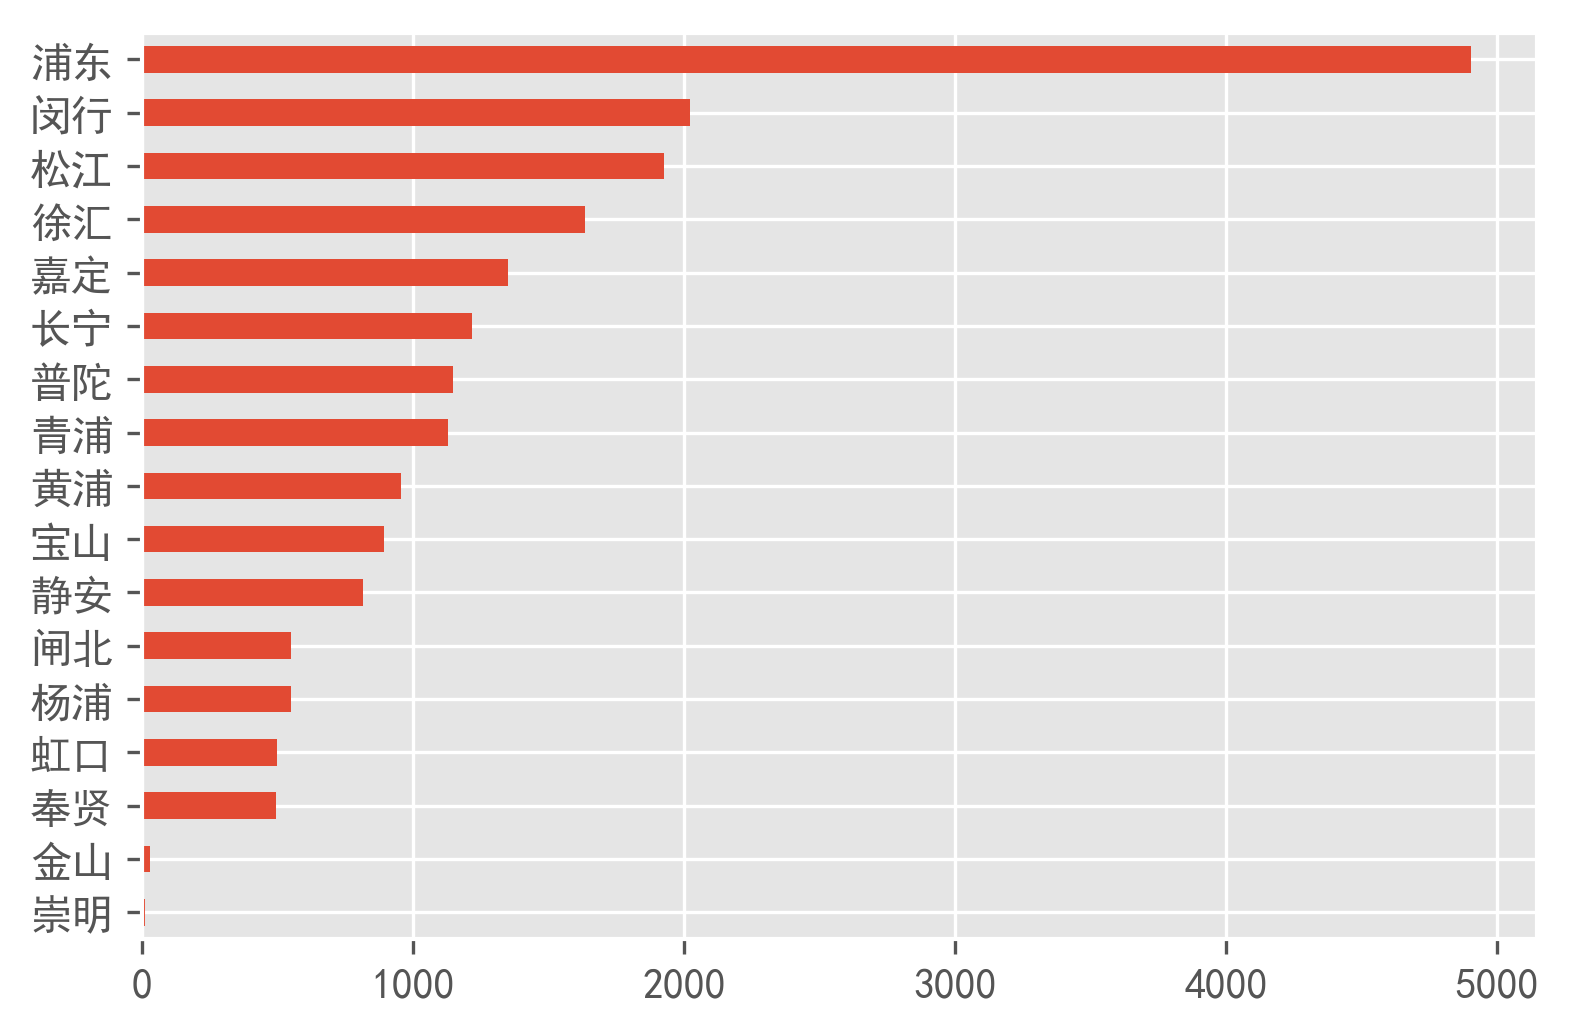

In [33]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='上海']['dist'].value_counts(ascending=True).plot.barh()

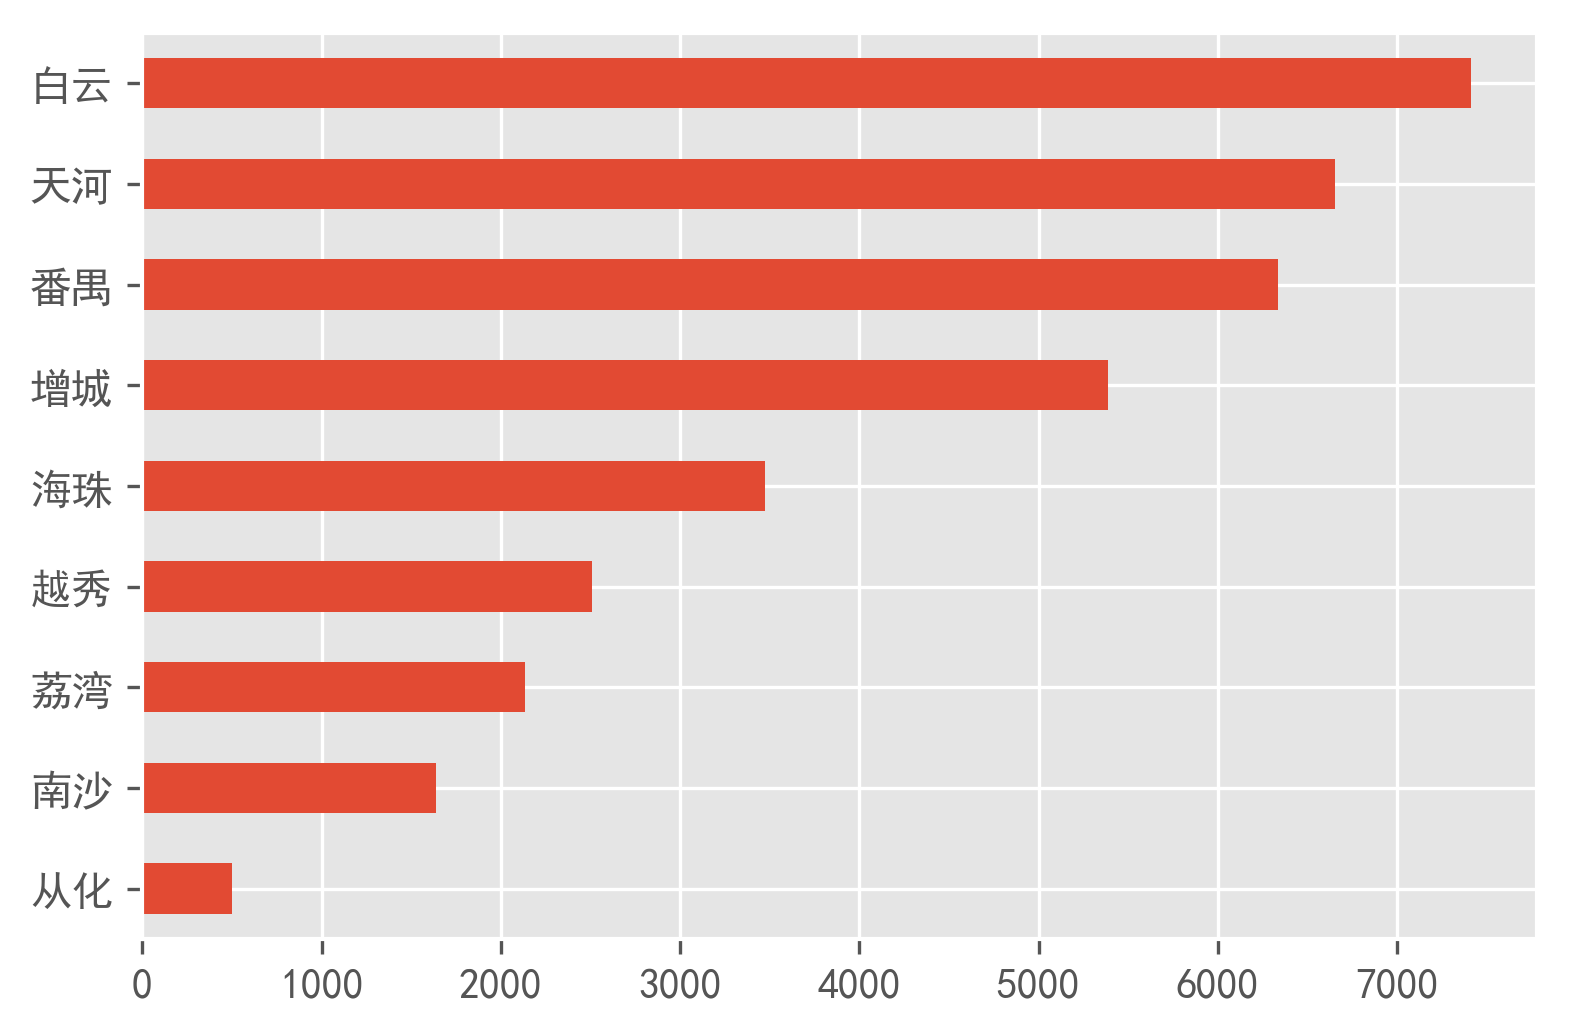

In [34]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='广州']['dist'].value_counts(ascending=True).plot.barh()

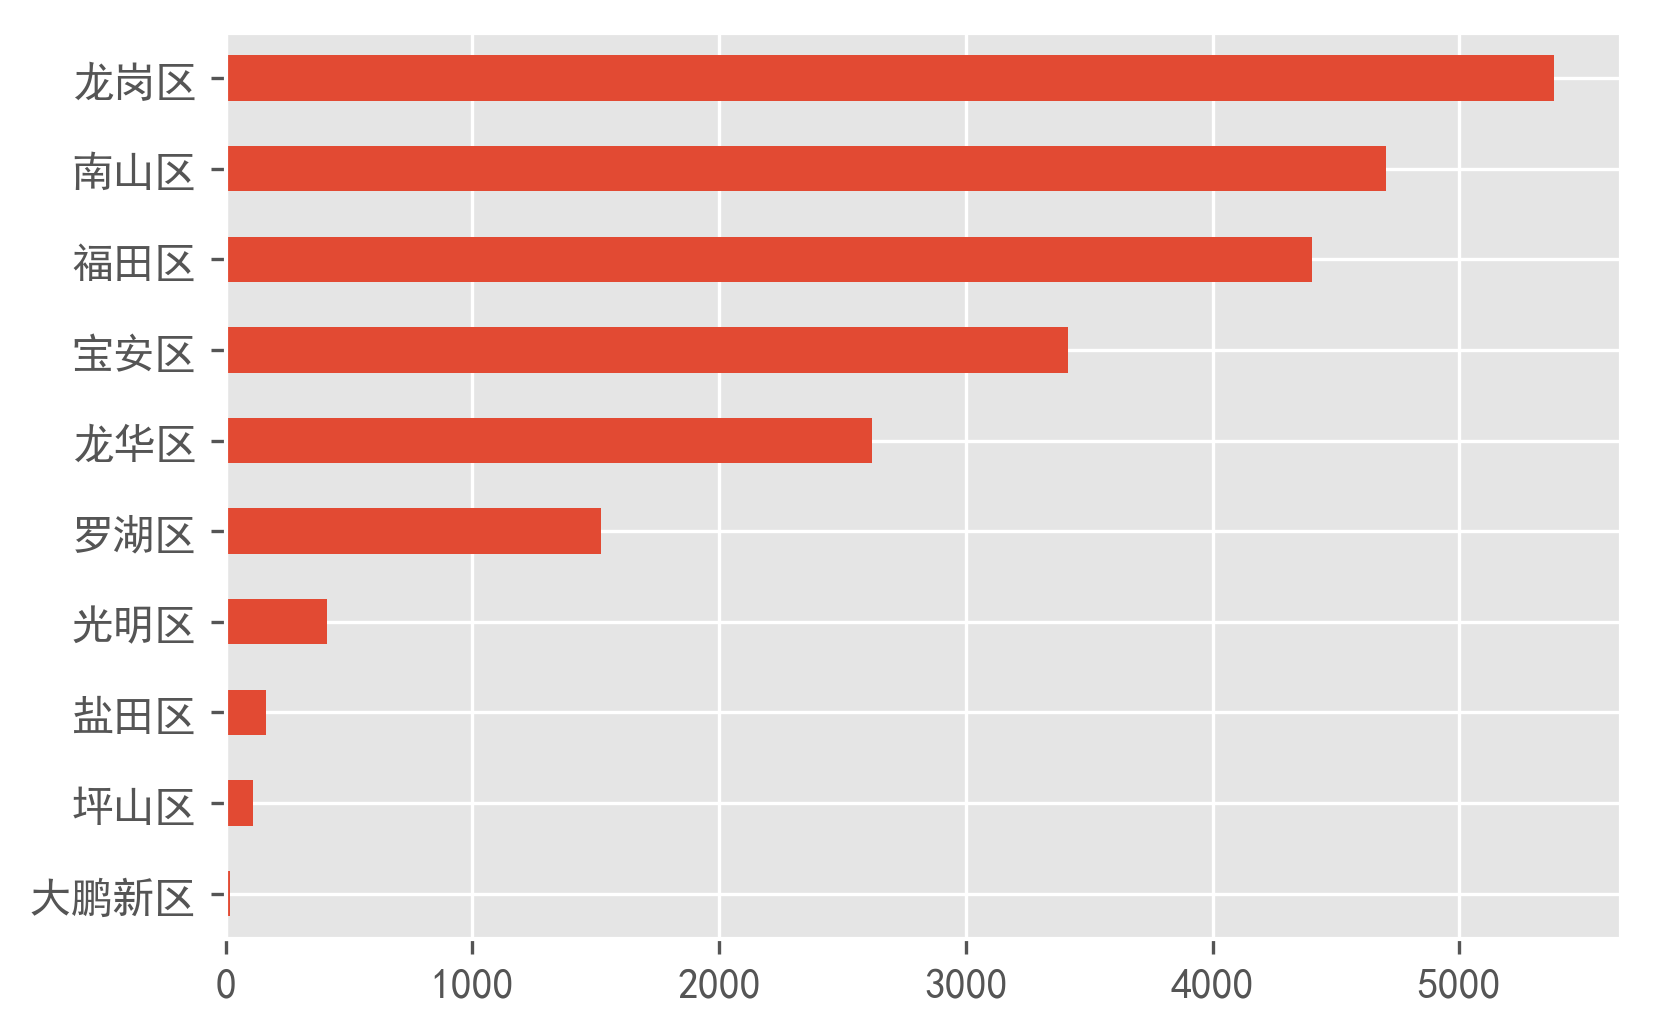

In [35]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='深圳']['dist'].value_counts(ascending=True).plot.barh()

### 2. 城市各区域的房价分布怎么样？

In [36]:
data['aver_price'] = np.round(data['rent_price_listing'] / data['rent_area'], 1)#每平方租金
data.head()

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,resblock_name,type,aver_price
0,2,3,世纪城,北京,海淀,721.0,南,2,近地铁 集中供暖 新上,垂虹园 3室2厅 南,39.967021,3室2厅2卫,116.293479,https://m.lianjia.com/chuzu/bj/zufang/BJ229062...,164.0,21000,垂虹园,整租,128.0
1,2,3,世纪城,北京,海淀,828.0,东南,2,精装 集中供暖 双卫生间 新上,整租·远大园五区 3室2厅 东南,39.959175,3室2厅2卫,116.289427,https://m.lianjia.com/chuzu/bj/zufang/BJ228955...,152.0,18000,远大园五区,整租,118.4
2,1,2,世纪城,北京,海淀,724.0,东南,1,近地铁 集中供暖 随时看房,远大园四区 2室1厅 东南,39.959747,2室1厅1卫,116.292721,https://m.lianjia.com/chuzu/bj/zufang/BJ228178...,85.0,8500,远大园四区,整租,100.0
3,2,3,世纪城,北京,海淀,1101.0,南 北,2,精装 集中供暖 双卫生间 新上 随时看房,整租·远大园一区 3室2厅 南/北,39.961689,3室2厅2卫,116.285995,https://m.lianjia.com/chuzu/bj/zufang/BJ228759...,165.0,18000,远大园一区,整租,109.1
4,2,3,世纪城,北京,海淀,873.0,东 南 北,2,近地铁 集中供暖 新上,春荫园 3室2厅 东/南/北,39.968979,3室2厅2卫,116.288287,https://m.lianjia.com/chuzu/bj/zufang/BJ229062...,162.0,18000,春荫园,整租,111.1


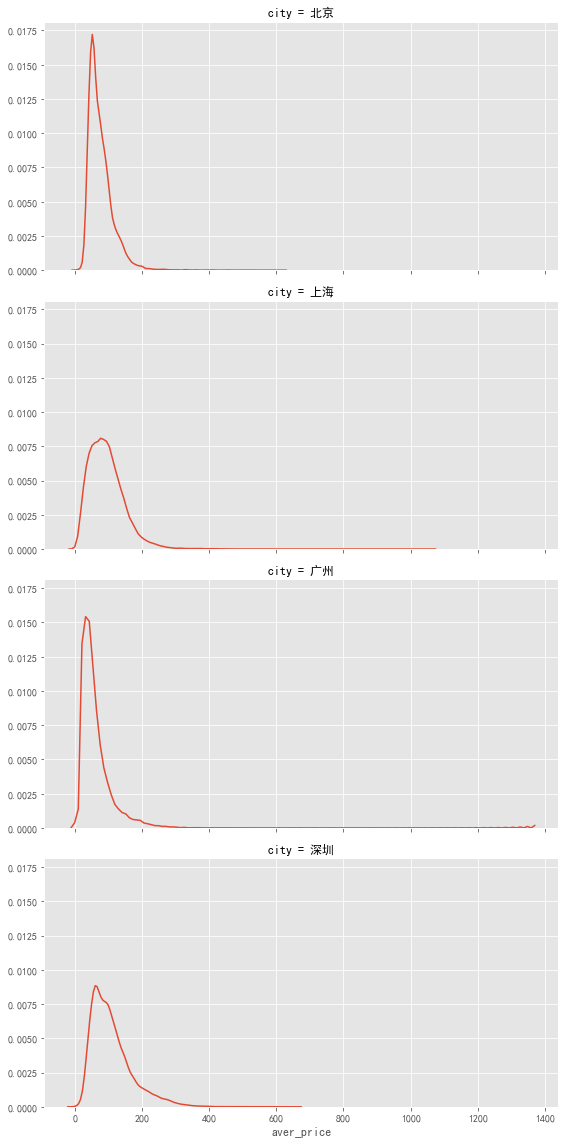

In [37]:
g = sns.FacetGrid(data, row="city", height=4, aspect=2)#按city分别画频率的折线图
g = g.map(sns.kdeplot, "aver_price")#横坐标是aver_price

In [38]:
# 由于平均租金基本上都集中在250元/平米/月以内，所以选取这部分数据绘制热力图
def get_city_zf_aver_price(city, city_short, col=['longitude', 'latitude', 'aver_price'], data=data):
    file_name = 'data_' + city_short + '_aver_price.csv'
    data_latlon = data.loc[(data['city']==city)&(data['aver_price']<=250), col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    #data_latlon.to_csv(file_name, index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))

In [39]:
get_city_zf_aver_price('北京', 'bj')
get_city_zf_aver_price('上海', 'sh')
get_city_zf_aver_price('广州', 'gz')
get_city_zf_aver_price('深圳', 'sz')

北京的数据一共有13637条
上海的数据一共有19876条
广州的数据一共有35793条
深圳的数据一共有21914条


In [40]:
# 各城市租金Top10的商圈#按城市和商圈分组算aver_price的平均值，再取出前50的商圈，算它们在各城市的分布
bc_top10 = data.groupby(['city', 'bizcircle_name'])['aver_price'].mean().nlargest(50).reset_index()['city'].value_counts()
lab=[str(i) for i in bc_top10.index]
val=[int(i) for i in bc_top10.values]

In [41]:
# from pyecharts import Bar
# bar = Bar("每平米平均租金前50的北上广深商圈数量", width=400)
# bar.add("", bc_top10.index, bc_top10.values, is_stack=True,
#        xaxis_label_textsize=16, yaxis_label_textsize=16, is_label_show=True)
from pyecharts.charts import Bar
bar=Bar()
bar.add_xaxis(lab)
bar.add_yaxis("",val)
bar.render_notebook()

In [43]:
def get_top10_bc(city, data=data):
    #取出城市为city,商圈不为空的数据，并按商圈计算aver_price的均值，取出前10个
    top10_bc = data[(data['city']==city)&(data['bizcircle_name']!='')].groupby('bizcircle_name')['aver_price'].mean().nlargest(10)
    #bar = Bar(city+"市每平米平均租金Top10的商圈", width=600)
    #bar.add("", top10_bc.index, np.round(top10_bc.values, 0), is_stack=True,
    #   xaxis_label_textsize=16, yaxis_label_textsize=16, xaxis_rotate=30, is_label_show=True)
    lab=[str(i) for i in top10_bc.index]
    value=[int(i) for i in top10_bc.values]
    bar=Bar()
    bar.add_xaxis(lab)
    bar.add_yaxis("",value)
    return bar.render_notebook()

In [44]:
# 北京每平米平均租金Top10的商圈
get_top10_bc('北京')

In [45]:
get_top10_bc('上海')

In [46]:
get_top10_bc('广州')

In [47]:
get_top10_bc('深圳')

### 3. 距离地铁口远近有什么关系？

In [48]:
from scipy import stats

In [49]:
def distance_price_relation(city, data=data):
    g = sns.jointplot(x="distance", #横坐标
                      y="aver_price", #纵坐标
                      #提取城市为city,aver_price<=350的数据，并按distance xxx?
                  data=data[(data['city']==city)&(data['aver_price']<=350)].dropna(subset=['distance']), 
                  kind="reg",#加回归线
                 stat_func=stats.pearsonr)
    g.fig.set_dpi(100)
    g.ax_joint.set_xlabel('最近地铁距离', fontweight='bold')#横坐标标签
    g.ax_joint.set_ylabel('每平米租金', fontweight='bold')#纵坐标标签
    return g

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


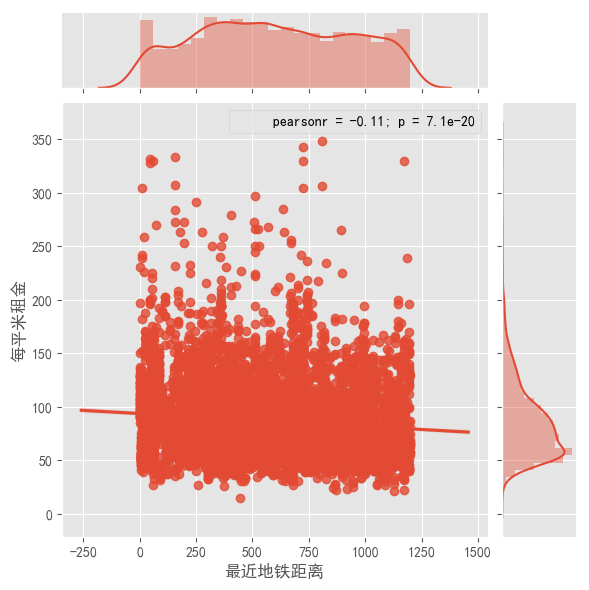

In [50]:
distance_price_relation('北京')

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


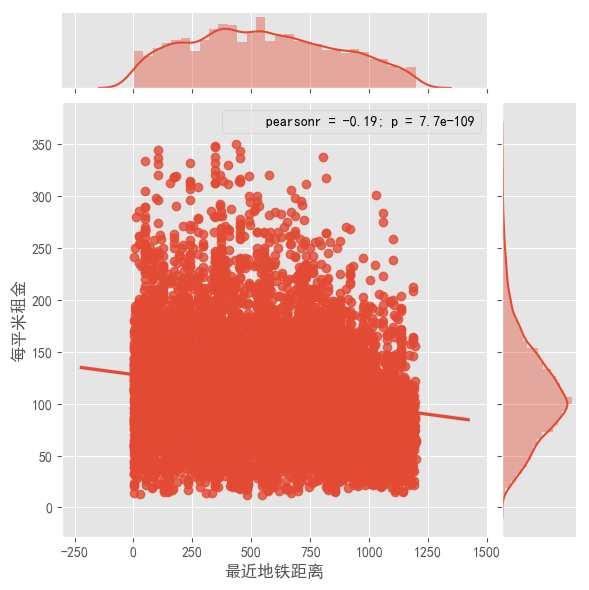

In [51]:
distance_price_relation('上海')

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


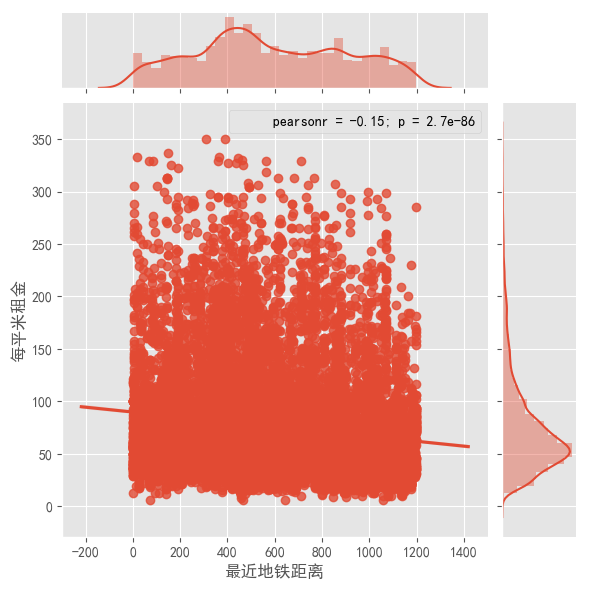

In [52]:
distance_price_relation('广州')

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


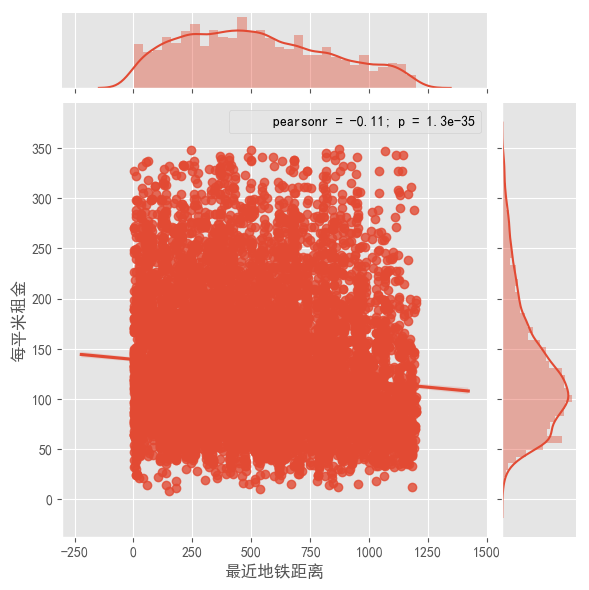

In [53]:
distance_price_relation('深圳')

In [54]:
bins = [100*i for i in range(13)]
data['bin'] = pd.cut(data.dropna(subset=['distance'])['distance'], bins)#按bins切割distance，作为1个新字段
data.head()

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,resblock_name,type,aver_price,bin
0,2,3,世纪城,北京,海淀,721.0,南,2,近地铁 集中供暖 新上,垂虹园 3室2厅 南,39.967021,3室2厅2卫,116.293479,https://m.lianjia.com/chuzu/bj/zufang/BJ229062...,164.0,21000,垂虹园,整租,128.0,"(700, 800]"
1,2,3,世纪城,北京,海淀,828.0,东南,2,精装 集中供暖 双卫生间 新上,整租·远大园五区 3室2厅 东南,39.959175,3室2厅2卫,116.289427,https://m.lianjia.com/chuzu/bj/zufang/BJ228955...,152.0,18000,远大园五区,整租,118.4,"(800, 900]"
2,1,2,世纪城,北京,海淀,724.0,东南,1,近地铁 集中供暖 随时看房,远大园四区 2室1厅 东南,39.959747,2室1厅1卫,116.292721,https://m.lianjia.com/chuzu/bj/zufang/BJ228178...,85.0,8500,远大园四区,整租,100.0,"(700, 800]"
3,2,3,世纪城,北京,海淀,1101.0,南 北,2,精装 集中供暖 双卫生间 新上 随时看房,整租·远大园一区 3室2厅 南/北,39.961689,3室2厅2卫,116.285995,https://m.lianjia.com/chuzu/bj/zufang/BJ228759...,165.0,18000,远大园一区,整租,109.1,"(1100, 1200]"
4,2,3,世纪城,北京,海淀,873.0,东 南 北,2,近地铁 集中供暖 新上,春荫园 3室2厅 东/南/北,39.968979,3室2厅2卫,116.288287,https://m.lianjia.com/chuzu/bj/zufang/BJ229062...,162.0,18000,春荫园,整租,111.1,"(800, 900]"


In [55]:
bin_bj = data[data['city']=='北京'].groupby('bin')['aver_price'].mean()#按bin计算均值
bin_sh = data[data['city']=='上海'].groupby('bin')['aver_price'].mean()
bin_gz = data[data['city']=='广州'].groupby('bin')['aver_price'].mean()
bin_sz = data[data['city']=='深圳'].groupby('bin')['aver_price'].mean()

In [56]:
# from pyecharts import Line
# line = Line("距离地铁远近跟每平米租金均价的关系")
# for city, bin_data in {'北京':bin_bj, '上海':bin_sh, '广州':bin_gz, '深圳':bin_sz}.items():
#     line.add(city, bin_data.index, bin_data.values,
#             legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
#              xaxis_rotate=20, yaxis_min=8, legend_top=30)
# line
from pyecharts.charts import Line
line=Line()
line.add_xaxis([str(i) for i in bin_bj.index])
for city, bin_data in {'北京':bin_bj, '上海':bin_sh, '广州':bin_gz, '深圳':bin_sz}.items():
    line.add_yaxis(str(city),[int(i) for i in bin_data.values])
line.render_notebook()

In [57]:
134.6-117#?

17.599999999999994

### 4. 房屋大小对每平米租金的影响如何？

In [58]:
def area_price_relation(city, data=data):
    fig = plt.figure(dpi=100)
    g = sns.lineplot(x="rent_area",#横坐标轴
                     y="aver_price",#纵坐标轴
                     data=data[(data['city']==city)&(data['rent_area']<150)],#取出指定city且rent_area<150的数据
                     ci=None)
    g.set_xlabel('面积', fontweight='bold')
    g.set_ylabel('每平米均价', fontweight='bold')
    return g

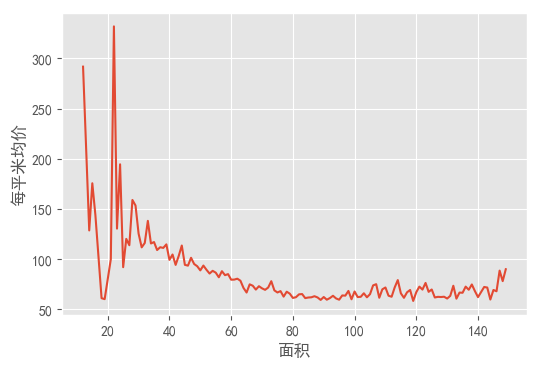

In [60]:
area_price_relation('北京')

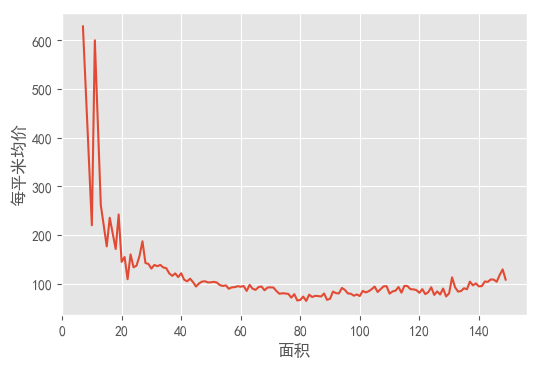

In [61]:
area_price_relation('上海')

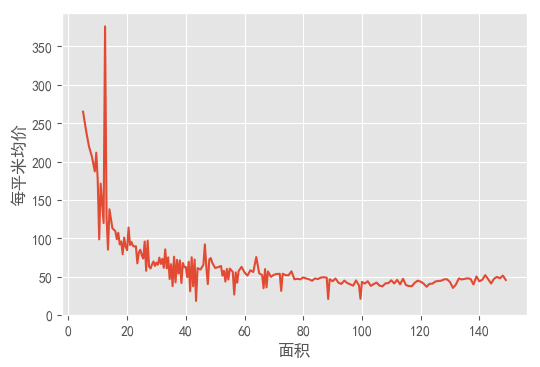

In [62]:
area_price_relation('广州')

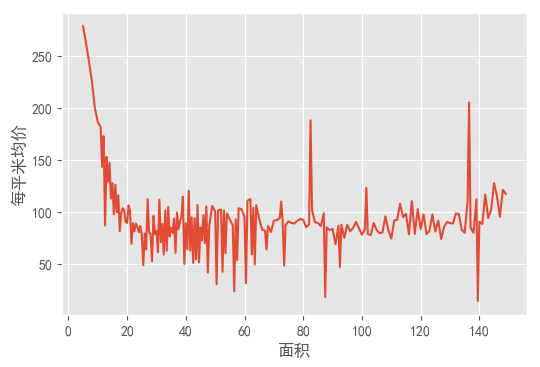

In [63]:
area_price_relation('深圳')

In [64]:
# 根据house_title和house_tag再造一个字段：is_dep，也就是“是否是公寓”
data['is_dep'] = (data['house_title'].str.contains('公寓') + data['house_tag'].str.contains('公寓')) > 0
data.head()

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,...,layout,longitude,m_url,rent_area,rent_price_listing,resblock_name,type,aver_price,bin,is_dep
0,2,3,世纪城,北京,海淀,721.0,南,2,近地铁 集中供暖 新上,垂虹园 3室2厅 南,...,3室2厅2卫,116.293479,https://m.lianjia.com/chuzu/bj/zufang/BJ229062...,164.0,21000,垂虹园,整租,128.0,"(700, 800]",False
1,2,3,世纪城,北京,海淀,828.0,东南,2,精装 集中供暖 双卫生间 新上,整租·远大园五区 3室2厅 东南,...,3室2厅2卫,116.289427,https://m.lianjia.com/chuzu/bj/zufang/BJ228955...,152.0,18000,远大园五区,整租,118.4,"(800, 900]",False
2,1,2,世纪城,北京,海淀,724.0,东南,1,近地铁 集中供暖 随时看房,远大园四区 2室1厅 东南,...,2室1厅1卫,116.292721,https://m.lianjia.com/chuzu/bj/zufang/BJ228178...,85.0,8500,远大园四区,整租,100.0,"(700, 800]",False
3,2,3,世纪城,北京,海淀,1101.0,南 北,2,精装 集中供暖 双卫生间 新上 随时看房,整租·远大园一区 3室2厅 南/北,...,3室2厅2卫,116.285995,https://m.lianjia.com/chuzu/bj/zufang/BJ228759...,165.0,18000,远大园一区,整租,109.1,"(1100, 1200]",False
4,2,3,世纪城,北京,海淀,873.0,东 南 北,2,近地铁 集中供暖 新上,春荫园 3室2厅 东/南/北,...,3室2厅2卫,116.288287,https://m.lianjia.com/chuzu/bj/zufang/BJ229062...,162.0,18000,春荫园,整租,111.1,"(800, 900]",False


In [65]:
# 每个城市房源的公寓占比
for city in ['北京', '上海', '广州', '深圳']:
    print(city+'的公寓占总房源量比重为:{}%。'.format(
        np.round(data[data['city']==city]['is_dep'].mean()*100, 2)))

北京的公寓占总房源量比重为:1.17%。
上海的公寓占总房源量比重为:7.5%。
广州的公寓占总房源量比重为:16.42%。
深圳的公寓占总房源量比重为:48.38%。


In [66]:
data[(data['city']=='广州')&
    (data['rent_area']>0)&
    (data['rent_area']<60)&
    (data['aver_price']>100)]['is_dep'].mean()#广州的租房面积在0~60之间，每平方米单价为100以上的房子中，公寓的占比

0.7496309418364334

### 5. 租个人房源好还是公寓好？

In [68]:
is_dep = data[(data['city'].isin(['广州','深圳']))&
             (data['is_dep']==1)].groupby('city')['aver_price'].mean()#计算广州、深圳的公寓的每平方米租金的平均值
not_dep = data[(data['city'].isin(['广州','深圳']))&
             (data['is_dep']==0)].groupby('city')['aver_price'].mean()#计算广州、深圳的非公寓的每平方米租金的平均值
print(is_dep)
print(not_dep)

city
广州    104.915056
深圳    115.625709
Name: aver_price, dtype: float64
city
广州     53.020984
深圳    103.529727
Name: aver_price, dtype: float64


In [74]:
# bar = Bar("个人房源和公寓的每平米租金差别", width=600)
# bar.add("个人房源", not_dep.index, np.round(not_dep.values, 0), 
#         legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
#         xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
# bar.add("公寓", is_dep.index, np.round(is_dep.values, 0),
#        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
#         xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
# bar
bar=Bar()
bar.add_xaxis([str(i) for i in is_dep.index])
for place,price in {"公寓":is_dep,"个人房源":not_dep}.items():   
    bar.add_yaxis(place,[int(i) for i in price.values])
bar.render_notebook()

### 5. 精装和简装对房子价格的影响

In [75]:
data['decorated'] = data[data['house_tag'].notna()]['house_tag'].str.contains('精装')#建一个新的字段，判断是否精装
data.head()

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,...,longitude,m_url,rent_area,rent_price_listing,resblock_name,type,aver_price,bin,is_dep,decorated
0,2,3,世纪城,北京,海淀,721.0,南,2,近地铁 集中供暖 新上,垂虹园 3室2厅 南,...,116.293479,https://m.lianjia.com/chuzu/bj/zufang/BJ229062...,164.0,21000,垂虹园,整租,128.0,"(700, 800]",False,False
1,2,3,世纪城,北京,海淀,828.0,东南,2,精装 集中供暖 双卫生间 新上,整租·远大园五区 3室2厅 东南,...,116.289427,https://m.lianjia.com/chuzu/bj/zufang/BJ228955...,152.0,18000,远大园五区,整租,118.4,"(800, 900]",False,True
2,1,2,世纪城,北京,海淀,724.0,东南,1,近地铁 集中供暖 随时看房,远大园四区 2室1厅 东南,...,116.292721,https://m.lianjia.com/chuzu/bj/zufang/BJ228178...,85.0,8500,远大园四区,整租,100.0,"(700, 800]",False,False
3,2,3,世纪城,北京,海淀,1101.0,南 北,2,精装 集中供暖 双卫生间 新上 随时看房,整租·远大园一区 3室2厅 南/北,...,116.285995,https://m.lianjia.com/chuzu/bj/zufang/BJ228759...,165.0,18000,远大园一区,整租,109.1,"(1100, 1200]",False,True
4,2,3,世纪城,北京,海淀,873.0,东 南 北,2,近地铁 集中供暖 新上,春荫园 3室2厅 东/南/北,...,116.288287,https://m.lianjia.com/chuzu/bj/zufang/BJ229062...,162.0,18000,春荫园,整租,111.1,"(800, 900]",False,False


In [76]:
decorated = data[data['decorated']==1].groupby('city')['aver_price'].mean()#计算每个城市的精装的每平方米租金
decorated

city
上海    125.965469
北京     86.429333
广州     65.579268
深圳    114.764202
Name: aver_price, dtype: float64

In [78]:
not_decorated = data[data['decorated']==0].groupby('city')['aver_price'].mean()#计算每个城市的非精装的每平方米租金
not_decorated

city
上海     97.582286
北京     73.526828
广州     70.906614
深圳    110.134114
Name: aver_price, dtype: float64

In [80]:
# bar = Bar("各城市精装和简装的每平米租金差别", width=600)
# bar.add("精装(刷过墙)", decorated.index, np.round(decorated.values, 0), 
#         legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
#         xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
# bar.add("简装(破房子)", not_decorated.index, np.round(not_decorated.values, 0),
#        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
#         xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
# bar
bar=Bar()
bar.add_xaxis([str(i) for i in decorated.index])
bar.add_yaxis("精装(刷过墙)",[int(i) for i in decorated.values])
bar.add_yaxis("简装(破房子)",[int(i) for i in not_decorated.values])
bar.render_notebook()

In [81]:
#广州和深圳的精装且为公寓的平均每平方米租金
is_dec_dep = data[(data['decorated']==1)&
                  (data['is_dep']==1)&
                 (data['city'].isin(['广州', '深圳']))].groupby('city')['aver_price'].mean()
is_dec_dep

city
广州    124.448748
深圳    109.925319
Name: aver_price, dtype: float64

In [82]:
#广州和深圳的精装且为非公寓的平均每平方米租金
is_dec_not_dep = data[(data['decorated']==1)&
                      (data['is_dep']==0)&
                     (data['city'].isin(['广州', '深圳']))].groupby('city')['aver_price'].mean()
is_dec_not_dep

city
广州     50.351695
深圳    119.116415
Name: aver_price, dtype: float64

In [83]:
#广州和深圳的非精装且为非公寓的平均每平方米租金
not_dec_dep = data[(data['decorated']==0)&
                   (data['is_dep']==0)&
                  (data['city'].isin(['广州', '深圳']))].groupby('city')['aver_price'].mean()
not_dec_dep

city
广州     60.374146
深圳    102.049483
Name: aver_price, dtype: float64

In [86]:
# bar = Bar("各城市装修和房源类型的每平米租金差别", width=600)
# bar.add("精装公寓", is_dec_dep.index, np.round(is_dec_dep.values, 0), 
#         legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
#         xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
# bar.add("精装个人房源", is_dec_not_dep.index, np.round(is_dec_not_dep.values, 0),
#        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
#         xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
# bar.add("简装个人房源", not_dec_dep.index, np.round(not_dec_dep.values, 0),
#        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
#         xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
# bar
bar=Bar()
bar.add_xaxis([str(i) for i in is_dec_dep.index])
bar.add_yaxis("精装公寓",[int(i) for i in is_dec_dep.values])
bar.add_yaxis("精装个人房源",[int(i) for i in is_dec_not_dep.values])
bar.add_yaxis("简装个人房源",[int(i) for i in not_dec_dep.values])
bar.render_notebook()

### 7. 北方集中供暖对价格的影响

In [87]:
data['ct_heating'] = data['house_tag'].str.contains('集中供暖')#新建一个字段，判断是否含有集中供暖
data.head()

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,...,m_url,rent_area,rent_price_listing,resblock_name,type,aver_price,bin,is_dep,decorated,ct_heating
0,2,3,世纪城,北京,海淀,721.0,南,2,近地铁 集中供暖 新上,垂虹园 3室2厅 南,...,https://m.lianjia.com/chuzu/bj/zufang/BJ229062...,164.0,21000,垂虹园,整租,128.0,"(700, 800]",False,False,True
1,2,3,世纪城,北京,海淀,828.0,东南,2,精装 集中供暖 双卫生间 新上,整租·远大园五区 3室2厅 东南,...,https://m.lianjia.com/chuzu/bj/zufang/BJ228955...,152.0,18000,远大园五区,整租,118.4,"(800, 900]",False,True,True
2,1,2,世纪城,北京,海淀,724.0,东南,1,近地铁 集中供暖 随时看房,远大园四区 2室1厅 东南,...,https://m.lianjia.com/chuzu/bj/zufang/BJ228178...,85.0,8500,远大园四区,整租,100.0,"(700, 800]",False,False,True
3,2,3,世纪城,北京,海淀,1101.0,南 北,2,精装 集中供暖 双卫生间 新上 随时看房,整租·远大园一区 3室2厅 南/北,...,https://m.lianjia.com/chuzu/bj/zufang/BJ228759...,165.0,18000,远大园一区,整租,109.1,"(1100, 1200]",False,True,True
4,2,3,世纪城,北京,海淀,873.0,东 南 北,2,近地铁 集中供暖 新上,春荫园 3室2厅 东/南/北,...,https://m.lianjia.com/chuzu/bj/zufang/BJ229062...,162.0,18000,春荫园,整租,111.1,"(800, 900]",False,False,True


In [89]:
data[data['city']=='北京'].groupby('ct_heating')['aver_price'].mean()#北京的是否供暖的房子的平均每平方米租金

ct_heating
False    77.841353
True     76.536475
Name: aver_price, dtype: float64

### 8. 各城市房屋租售比

In [93]:
zs_ratio = [57036, 62779, 32039, 56758]/((data.groupby('city')['rent_price_listing'].sum()/data.groupby('city')['rent_area'].sum())*12)
zs_ratio#平均房价（买）与平均租金的比

city
上海    49.384111
北京    68.773261
广州    50.614848
深圳    47.063603
dtype: float64

In [92]:
# bar = Bar("各城市房屋租售比(租多少年可以在该城市买下一套房)", width=450)
# bar.add("", zs_ratio.index, np.round(zs_ratio.values, 0), 
#         legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
#         xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
# bar
bar=Bar()
bar.add_xaxis([str(i) for i in zs_ratio.index])
bar.add_yaxis("",[int(i) for i in zs_ratio.values])
bar.render_notebook()

### 9. 北上广深租房时都看重什么？

In [99]:
def layout_top3(city, data):
    layout_data = data[data['city']==city]['layout'].value_counts().nlargest(3)#取出指定城市的最多的3个layout
    #bar = Bar(city+"最受欢迎的户型", width=600)
    #bar.add("", layout_data.index, layout_data.values, 
    #    legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
    #    xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
    #return bar
    bar=Bar()
    bar.add_xaxis([str(i) for i in layout_data.index])
    bar.add_yaxis("",[int(i) for i in layout_data.values])
    return bar.render_notebook()

In [100]:
layout_top3('北京', data)

In [101]:
layout_top3('上海', data)

In [102]:
layout_top3('广州', data)

In [103]:
layout_top3('深圳', data)

In [111]:
from pyecharts.charts import WordCloud
from collections import Counter

In [126]:
bj_tag = []
for st in data[data['city']=='北京'].dropna(subset=['house_tag'])['house_tag']:#取出北京的所有非空的house_tag
    bj_tag.extend(st.split(' '))#按空格切割存入一个list
freq=[(name,value) for name,value in Counter(bj_tag).items()]#计算每个元素的频数
print(freq)
# name, value = WordCloud.cast(Counter(bj_tag))
# wordcloud = WordCloud(width=500, height=500)
# wordcloud.add("", name, value, word_size_range=[20, 100])
wordcloud=WordCloud()
wordcloud.add("",freq)#按频数出词云
wordcloud.render_notebook()

[('近地铁', 5688), ('集中供暖', 10684), ('新上', 2672), ('精装', 3283), ('双卫生间', 1210), ('随时看房', 5821), ('押一付一', 5), ('月租', 18)]


In [128]:
sh_tag = []
for st in data[data['city']=='上海'].dropna(subset=['house_tag'])['house_tag']:
    sh_tag.extend(st.split(' '))

# name, value = WordCloud.cast(Counter(sh_tag))
# wordcloud = WordCloud(width=500, height=500)
# wordcloud.add("", name, value, word_size_range=[20, 100])
# wordcloud
freq=[(name,value) for name,value in Counter(sh_tag).items()]#计算每个元素的频数
print(freq)
wordcloud=WordCloud()
wordcloud.add("",freq)#按频数出词云
wordcloud.render_notebook()

[('近地铁', 10616), ('新上', 3676), ('精装', 4619), ('随时看房', 4078), ('双卫生间', 1699), ('押一付一', 146), ('月租', 11)]


In [129]:
gz_tag = []
for st in data[data['city']=='广州'].dropna(subset=['house_tag'])['house_tag']:
    gz_tag.extend(st.split(' '))

# name, value = WordCloud.cast(Counter(gz_tag))
# wordcloud = WordCloud(width=500, height=500)
# wordcloud.add("", name, value, word_size_range=[20, 100])
# wordcloud
freq=[(name,value) for name,value in Counter(gz_tag).items()]#计算每个元素的频数
print(freq)
wordcloud=WordCloud()
wordcloud.add("",freq)#按频数出词云
wordcloud.render_notebook()

[('随时看房', 7366), ('独栋公寓', 3245), ('月租', 3275), ('有阳台', 2078), ('开放厨房', 2069), ('押一付一', 2334), ('公寓', 2321), ('精装', 3304), ('新上', 4730), ('双卫生间', 1295), ('贝壳实勘', 130), ('近地铁', 15869), ('拎包入住', 620), ('独立卫生间', 178), ('独立阳台', 525), ('限女生', 38), ('限男生', 19)]


In [130]:
sz_tag = []
for st in data[data['city']=='深圳'].dropna(subset=['house_tag'])['house_tag']:
    sz_tag.extend(st.split(' '))

# name, value = WordCloud.cast(Counter(sz_tag))
# wordcloud = WordCloud(width=500, height=500)
# wordcloud.add("", name, value, word_size_range=[20, 100])
# wordcloud
freq=[(name,value) for name,value in Counter(sz_tag).items()]#计算每个元素的频数
print(freq)
wordcloud=WordCloud()
wordcloud.add("",freq)#按频数出词云
wordcloud.render_notebook()

[('近地铁', 15245), ('新上', 3407), ('随时看房', 11141), ('独栋公寓', 5267), ('开放厨房', 4001), ('公寓', 5443), ('月租', 6898), ('双卫生间', 1250), ('有阳台', 2563), ('押一付一', 2833), ('精装', 5288), ('拎包入住', 1699), ('独立阳台', 756), ('限女生', 17), ('限男生', 5), ('独立卫生间', 385)]
